Import the MNIST data

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Reading the input data with one-hot encoded equals true. With one-hot encoded the label will be having value as "1" for one of the index positions 
#from 0 to 9. And, for the rest the value will be "0"

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
# Number of Training examples

mnist.train.num_examples

55000

In [6]:
# Number of Test examples

mnist.test.num_examples

10000

In [7]:
# Shape of Training Data

mnist.train.images.shape

(55000, 784)

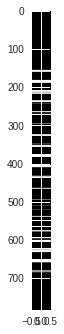

In [8]:
# Visualizing the input record with shape as 1 single vector.

import matplotlib.pyplot as plt
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

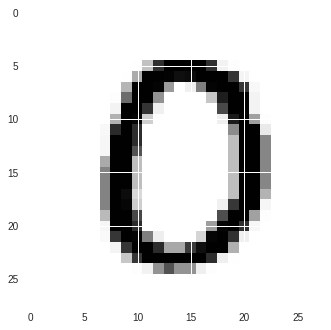

In [9]:
# MNIST data record is a 28*28 matrix. Hence, to view the image, the data needs to be "reshaped"

# Let's take an example at index 10

import matplotlib.pyplot as plt

plt.imshow(mnist.train.images[10].reshape(28 , 28))

In [0]:
# Initialize param

learning_rate = 0.001
training_epochs = 15 # 20
batch_size = 500 # 100 # 1000
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024


In [0]:
# As we want to define a network with 5 layers will initialize 5 different sets of both hidden-layer and Bias respective parameters.

# Hidden-layer and bias random normal initialization

hl1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
hl2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
hl3 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]))
hl4 = tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4]))
hl5 = tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5]))
hl_out = tf.Variable(tf.random_normal([n_hidden_5, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_hidden_3]))
b4 = tf.Variable(tf.random_normal([n_hidden_4]))
b5 = tf.Variable(tf.random_normal([n_hidden_5]))
b_out = tf.Variable(tf.random_normal([n_classes]))

In [0]:
# Function ff which will take the input data, hidden-layer neuron and bias and then perform the operation
# output of each layer will get passed to the successor layer.

def network(x):
  layer_1 = tf.add(tf.matmul(x, hl1), b1)
  sm_lay_1 = tf.nn.softmax(layer_1)
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, hl2),b2)
  sm_lay_2 = tf.nn.softmax(layer_2)
  layer_2 = tf.nn.relu(layer_2)
  
  layer_3 = tf.add(tf.matmul(layer_2, hl3),b3)
  sm_lay_3 = tf.nn.softmax(layer_3)
  layer_3 = tf.nn.relu(layer_3)
  
  layer_4 = tf.add(tf.matmul(layer_3, hl4),b4)
  sm_lay_4 = tf.nn.softmax(layer_4)
  layer_4 = tf.nn.relu(layer_4)
  
  layer_5 = tf.add(tf.matmul(layer_4, hl5),b5)
  sm_lay_5 = tf.nn.softmax(layer_5)
  layer_5 = tf.nn.relu(layer_5)
  
  
  out_layer = tf.add(tf.matmul(layer_5, hl_out),b_out)
  
  return out_layer,sm_lay_1, layer_1, layer_2, layer_3, layer_4, layer_5

In [0]:
# Input placeholder 

x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

In [0]:
# Call funtion

pred, sm_lay_1 , layer_1 , layer_2, layer_3, layer_4, layer_5= network(x)

In [0]:
# Cost which we want to minimize

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred,labels = y))


In [0]:
# Opimizer

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [20]:
# opening tf session

sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
sess.run(init)

# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
    
  print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nFinally the Model has completed {} epochs of training".format(training_epochs))
  
  


1 Epoch: cost is 7074498.1011 
2 Epoch: cost is 1241514.4653 
3 Epoch: cost is 648833.9889 
4 Epoch: cost is 364395.3619 
5 Epoch: cost is 199758.9711 
6 Epoch: cost is 107211.6674 
7 Epoch: cost is 56232.4888 
8 Epoch: cost is 35322.9485 
9 Epoch: cost is 21044.4731 
10 Epoch: cost is 12710.2063 
11 Epoch: cost is 8261.4500 
12 Epoch: cost is 7854.9520 
13 Epoch: cost is 12724.1833 
14 Epoch: cost is 12406.5578 
15 Epoch: cost is 13610.2396 

Finally the Model has completed 15 epochs of training


In [0]:
# Model Evaluation

# FInd the index location where the "pred" value is coming as 1. 

# FInd the index location where the "y" lable value is coming as 1.

# Finally compare the 2 values using tf.equal

correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [22]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [0]:
# As the correct_predictions return type value is of type Boolean so will CAST it to Float

correct_predictions = tf.cast(correct_predictions,float)

In [24]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [0]:
# Calculate MEAN across tensors which will give the Train Data Set Accuracy

accuracy = tf.reduce_mean(correct_predictions)

In [26]:
# Read the MNIST TEST data and calculate Test Data accuracy using "eval" function

accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

# I noticed that if we change the parameters like learning rate or the number-of-epochs the accuracy can go upto around 96%

0.9419

Q1, part3 onwards

<class 'numpy.ndarray'>
(10000, 1024)
prob list [5.7989519e-07 4.7767544e-06 8.5591005e-08 ... 2.0084194e-10 1.6312164e-08
 6.7061706e-06]


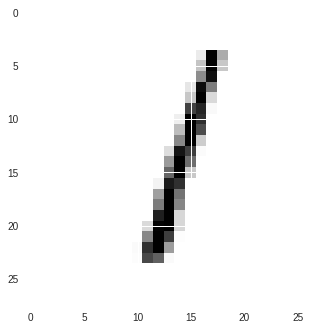

In [27]:
# Creating a probability Matrix for Layer-1
layer_1_probabilities=sm_lay_1

# Using the above tensor to calculate the test data layer-1 probabilities
layer_1_prob = layer_1_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Checking the return type
print(type(layer_1_prob))

# Checking the shape
print(layer_1_prob.shape)

# Checking the specific value. Eg: at index 2 below
print("prob list", layer_1_prob[2])

# Plotting 
plt.imshow(mnist.test.images[2].reshape(28 , 28))

<class 'numpy.ndarray'>
(10000, 10)
prob list [-19638952.   46195572.    4964855.5  -9790029.   -8726835.   -3790490.5
 -33992172.    9682689.    3291825.5 -21919764. ]


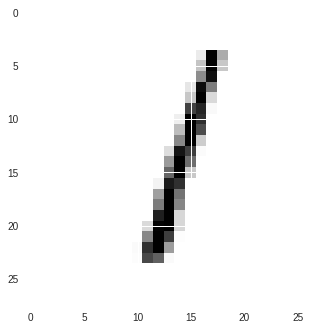

In [28]:
# Creating a probability Matrix for the final result of network function
probabilities=pred

# Using the above tensor to calculate the test data probabilities
prob = probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Checking the return type
print(type(prob))

# Checking the shape
print(prob.shape)

# Checking the specific value. Eg: at index 2 below
print("prob list", prob[2])

# Plotting
plt.imshow(mnist.test.images[2].reshape(28 , 28))


In [29]:
# Finding the index position
max_probability = tf.argmax(pred,1)

max_prob = max_probability.eval(feed_dict={x: mnist.test.images})
print(max_prob.shape)
print("max_prob[2]:", max_prob[2])

(10000,)
max_prob[2]: 1


In [0]:
# Read the Probability values for each class and create a 2D list which will be used further for prinitng
import pandas as pd
import numpy as np

# Create Pandas DataFrame for the "prob" variable created above
df = pd.DataFrame(prob)

# Initialize empty List
top_index_list=[]

# Read the dataframe column by column i.e., from 0 to 9
  # use argsort to identify the Index position of the row with maximum probability
  # used [::-1] to reverse the order like DESC
  # used [:10] to get the top 10
  # Appended All Class  top values in a list "top_index_list"

for col_index in range(n_classes):
  df_prob = (df.T.iloc[col_index])
  col = np.argsort(np.array(df.T.iloc[col_index]))[::-1][:10]
  top_index_list.append(col)

In [31]:
# Top 10:  print top_index_list resut in 2D

np.array(top_index_list)

array([[2747, 8528, 9060, 8056,  440, 6129, 8023, 9239, 9528, 4999],
       [7581, 7563, 8305, 8324, 9489, 8090, 9772, 8980, 8118, 3593],
       [9389, 5282, 5340, 7815, 8793, 6123,  796, 7772, 7022, 4055],
       [8026, 3221, 8206, 8777, 8970, 8780, 5538, 6727, 1479, 5150],
       [5082, 8529, 7910, 3174, 6102, 1419, 3996,  736,  843, 2340],
       [7777, 9176, 9085, 5275, 5325, 6880, 5295, 7965, 2855, 5668],
       [3602, 6068, 2337, 6128, 8013, 7792,  937, 7824,  665, 5161],
       [9087, 3535, 6360, 9164, 5751, 8480, 9899, 9108, 7844, 7355],
       [7774, 7814, 7926, 9055,  864, 8015, 4486, 3389, 2470, 3348],
       [3885, 5941,  673, 3783, 7254, 8899,  634,  501, 8841, 8933]])

In [32]:
# Checking manually the probability values for few top examples

print(df_prob.iloc[9060])
print(df_prob.iloc[8528])
print(df_prob.iloc[1457])
print(df_prob.iloc[5669])
print(df_prob.iloc[6127])

-6124603.5
-6427276.0
-26040532.0
-23851998.0
-23539124.0


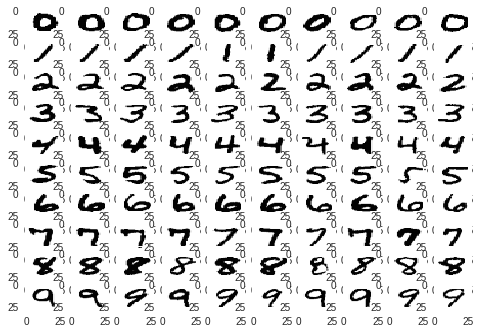

In [33]:
# Plot top 10 images for each class 0-9

fig,axis = plt.subplots(10,10) 
for i in range(10): 
    for j in range(10): 
        k= np.array(top_index_list)[i][j]
        
        axis[i][j].imshow(mnist.test.images[k].reshape(28,28), aspect='auto') 
        
plt.show()

In [0]:
# Q- 1.4

In [0]:
# Creating a probability Matrix for the final result of network function
probabilities_layer_1=layer_1

# Using the above tensor to calculate the test data probabilities
prob_layer_1 = probabilities_layer_1.eval(feed_dict={x: mnist.test.images}, session=sess)

# prob_layer_1.shape === > (10000, 1024) 

prob_layer_1_transpose = prob_layer_1.T  # ==== > Will first TRANSPOSE so that we can choose 10 rows out of 1024

# prob_layer_1_transpose.shape  =====>> (1024, 10000)

# Select 10 random samples

import numpy as np 
rand_ind = np.random.randint(len(prob_layer_1_transpose),size=10)

prob_layer_1_transpose_modified = prob_layer_1_transpose[rand_ind]

# prob_layer_1_transpose_modified.shape ===>> (10, 10000)

# transpose back, so that we again get 10 columns and 10000 rows

prob_layer_1_RE_transpose = prob_layer_1_transpose_modified.T


In [36]:
prob_layer_1_RE_transpose.shape

(10000, 10)

In [0]:
# Read the Probability values for each class and create a 2D list which will be used further for prinitng
import pandas as pd
import numpy as np

# Create Pandas DataFrame for the "prob" variable created above
df_1 = pd.DataFrame(prob_layer_1_RE_transpose)

# Initialize empty List
top_index_list_1=[]

# Read the dataframe column by column i.e., from 0 to 9
  # use argsort to identify the Index position of the row with maximum probability
  # used [::-1] to reverse the order like DESC
  # used [:10] to get the top 10
  # Appended All Class  top values in a list "top_index_list_1"

for col_index in range(n_classes):
  df_prob_1 = (df_1.T.iloc[col_index])
  col = np.argsort(np.array(df_1.T.iloc[col_index]))[::-1][:10]
  top_index_list_1.append(col)

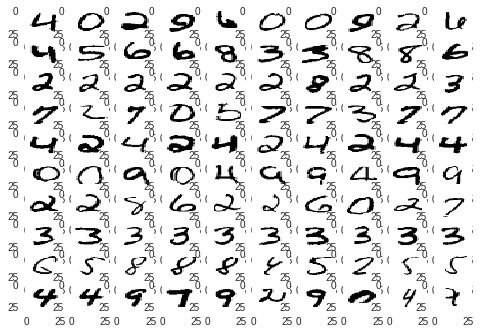

In [38]:
# Plot top 10 images for each class 0-9

fig,axis = plt.subplots(10,10) 
for i in range(10): 
    for j in range(10): 
        k= np.array(top_index_list_1)[i][j]
        
        axis[i][j].imshow(mnist.test.images[k].reshape(28,28), aspect='auto') 
        
plt.show()

In [0]:
# Principal Component Analysis

In [0]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mnist.train.images)
x_train_pca = pca.transform(mnist.train.images)


In [41]:
mnist.train.images.shape

(55000, 784)

In [42]:
x_train_pca.shape

(55000, 2)

In [43]:
mnist.train.labels[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [44]:
# Reading MNIST data again without one-hot encoding so that the labels can be read as 1 vector

mnist_2 = input_data.read_data_sets('MNIST_data')
mnist_2.train.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

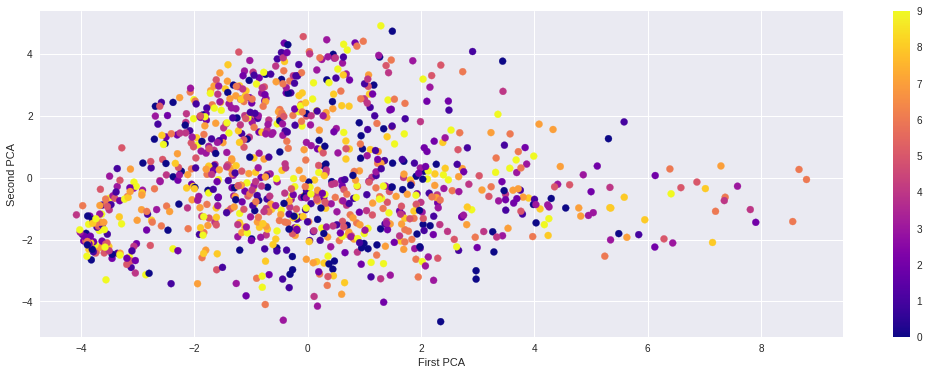

In [45]:
# Plotting 1000 from train data set

plt.figure(figsize=(18,6))
plt.scatter(x_train_pca[:1000,0],x_train_pca[:1000,1],c=mnist_2.train.labels[:1000],cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()


In [0]:
# Read Mnist Test data 1000 examples

mnist_1000_test = mnist.test.images[:1000,]

In [0]:
# Check Shape
mnist_1000_test.shape

(1000, 784)

In [0]:
# Test data: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mnist_1000_test)
mnist_1000_test_pca = pca.transform(mnist_1000_test)

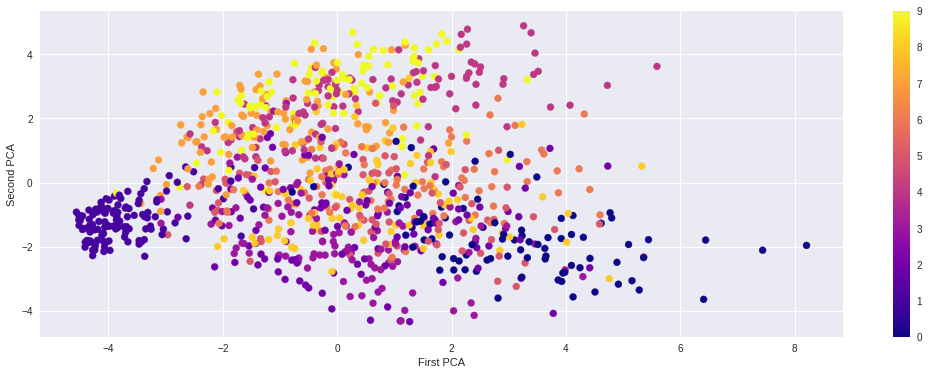

In [0]:
# Plotting 1000 examples from test data set

plt.figure(figsize=(18,6))
plt.scatter(mnist_1000_test_pca[:,0],mnist_1000_test_pca[:,1],c=mnist_2.test.labels[:1000],cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 

<class 'numpy.ndarray'>
(10000, 1024)
prob list [7.238984   3.0226398  0.70406115 ... 1.0546292  6.0004654  0.        ]


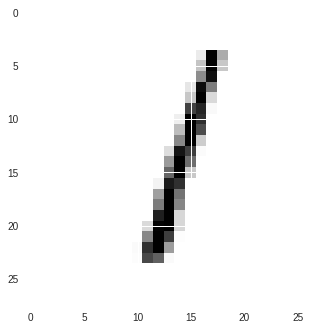

In [0]:
# Creating a probability Matrix for Layer-1
layer_1_probabilities=layer_1

# Using the above tensor to calculate the test data layer-1 probabilities
layer_1_prob = layer_1_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Checking the return type
print(type(layer_1_prob))

# Checking the shape
print(layer_1_prob.shape)

# Checking the specific value. Eg: at index 2 below
print("prob list", layer_1_prob[2])

# Plotting 
plt.imshow(mnist.test.images[2].reshape(28 , 28))

In [0]:
# Fetching 1000 examples

layer_1_prob_1000_samples = layer_1_prob[:1000,]

In [0]:
# Checking shape

layer_1_prob_1000_samples.shape

(1000, 1024)

In [0]:
type(layer_1_prob_1000_samples)

numpy.ndarray

In [0]:
# Finding index where the prob value is maximum

np.argmax(layer_1_prob_1000_samples, axis=1)



array([ 403,  207,  376,   81,  533,  376,  987,  683,  533,  987,  875,
        533,  367,  500,  174,  174,  183,  403,  332,  542,  987,  245,
         30,  279,  549,   30,  556,  683,   81,  594,  435,  594,  428,
        156,  596,  984,  632,  594,   96,  571,  687,  476,  987,  631,
        442,  279,   63,  668,  367,  419,   30,  228,  533,  207,  672,
        683,  533,  376,  118,  566,  207,  683,  658,  724,  367,  364,
        376,  533,  915,  738,  403,  500,  875,  987,  628,  556,  207,
        668,  376,  376,  249,  683,   11,  449,  687,  533,  628,  118,
        179,  376,  207,  683,  363,  915,   63,   30,   63,  987,  279,
        926,  726,   81,  998,  533,  680,  249,  875,    9,  915,  780,
        221,  915,  174,   93,  311,  535,  893,  533,  303,  845,  428,
        729,  449,  341,  987,  683,   30,  136,  915,  136,   30,  683,
        328,  987,  542,  571,  279,  376,  643,  533,  328,  249,  367,
        376,  982,  594,  606,  412,  500,  324,  9

In [0]:
layer_1_prob_1000_samples_MAX  = np.argmax(layer_1_prob_1000_samples,axis=1)

In [0]:
# Checking shape

layer_1_prob_1000_samples_MAX.shape


(1000,)

(array([648.,  91.,  89.,  68.,  56.,  26.,  23.,  14.,   2.,   7.]),
 array([ 0.        ,  2.18047848,  4.36095695,  6.54143543,  8.72191391,
        10.90239239, 13.08287086, 15.26334934, 17.44382782, 19.6243063 ,
        21.80478477]),
 <a list of 10 Patch objects>)

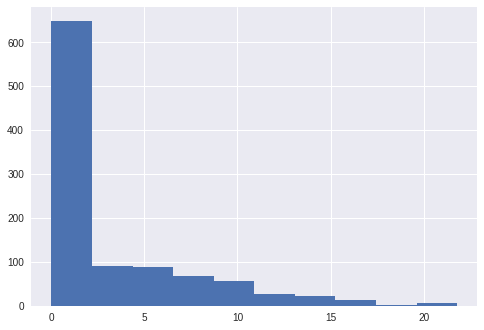

In [0]:
# plotting the distribution for 1 example

plt.hist(layer_1_prob_1000_samples[0])

In [0]:
# Test data: PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(layer_1_prob_1000_samples)
layer_1_prob_1000_samples_pca = pca.transform(layer_1_prob_1000_samples)

In [0]:
# Shape after PCA tramsfpormation

layer_1_prob_1000_samples_pca.shape

(1000, 2)

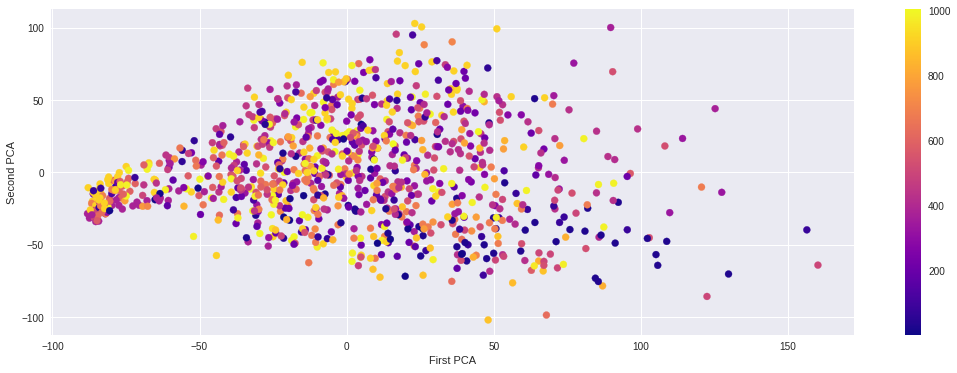

In [0]:
# Plotting 1000 examples from  Layer-1 output

plt.figure(figsize=(18,6))
plt.scatter(layer_1_prob_1000_samples_pca[:,0],layer_1_prob_1000_samples_pca[:,1],c=layer_1_prob_1000_samples_MAX,cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 
# Data is spread across 0 to 1000 classes.

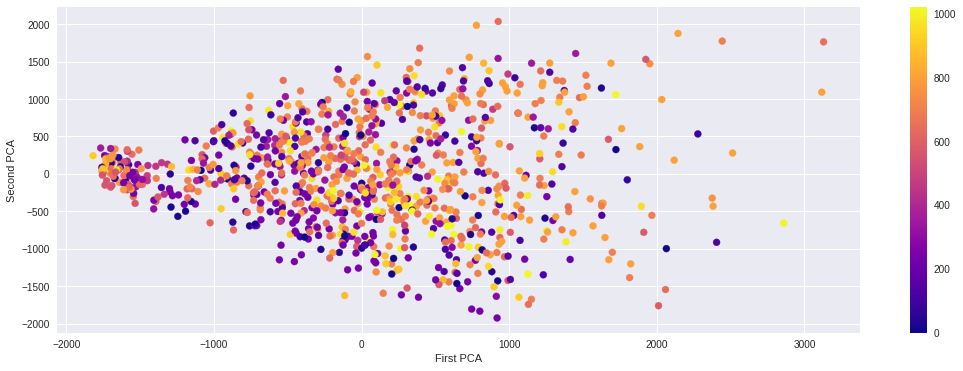

In [0]:
# Creating a probability Matrix for Layer-2
layer_2_probabilities=layer_2

# Using the above tensor to calculate the test data layer-1 probabilities
layer_2_prob = layer_2_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Fetching 1000 examples
layer_2_prob_1000_samples = layer_2_prob[:1000,]

# Capturing MAX index locations
layer_2_prob_1000_samples_MAX  = np.argmax(layer_2_prob_1000_samples,axis=1)

# Test data: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(layer_2_prob_1000_samples)
layer_2_prob_1000_samples_pca = pca.transform(layer_2_prob_1000_samples)

# Plotting 1000 examples from  Layer-2 output

plt.figure(figsize=(18,6))
plt.scatter(layer_2_prob_1000_samples_pca[:,0],layer_2_prob_1000_samples_pca[:,1],c=layer_2_prob_1000_samples_MAX,cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 
# Data is spread across 0 to 1000 classes.

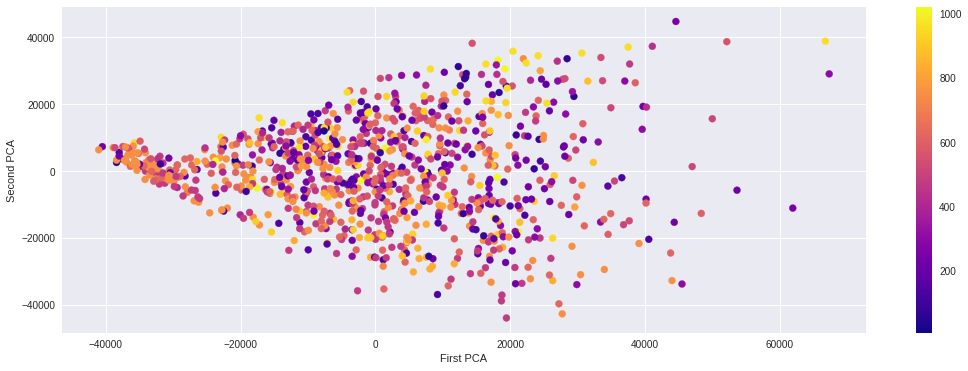

In [0]:
# Creating a probability Matrix for Layer-3
layer_3_probabilities=layer_3

# Using the above tensor to calculate the test data layer-1 probabilities
layer_3_prob = layer_3_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Fetching 1000 examples
layer_3_prob_1000_samples = layer_3_prob[:1000,]

# Capturing MAX index locations
layer_3_prob_1000_samples_MAX  = np.argmax(layer_3_prob_1000_samples,axis=1)

# Test data: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(layer_3_prob_1000_samples)
layer_3_prob_1000_samples_pca = pca.transform(layer_3_prob_1000_samples)

# Plotting 1000 examples from  Layer-3 output

plt.figure(figsize=(18,6))
plt.scatter(layer_3_prob_1000_samples_pca[:,0],layer_3_prob_1000_samples_pca[:,1],c=layer_3_prob_1000_samples_MAX,cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 
# Data is spread across 0 to 1000 classes.

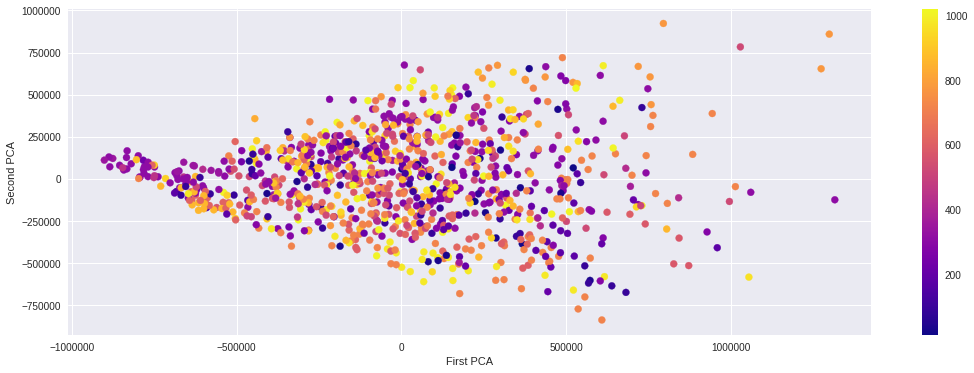

In [0]:
# Creating a probability Matrix for Layer-4
layer_4_probabilities=layer_4

# Using the above tensor to calculate the test data layer-1 probabilities
layer_4_prob = layer_4_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Fetching 1000 examples
layer_4_prob_1000_samples = layer_4_prob[:1000,]

# Capturing MAX index locations
layer_4_prob_1000_samples_MAX  = np.argmax(layer_4_prob_1000_samples,axis=1)

# Test data: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(layer_4_prob_1000_samples)
layer_4_prob_1000_samples_pca = pca.transform(layer_4_prob_1000_samples)

# Plotting 1000 examples from  Layer-4 output

plt.figure(figsize=(18,6))
plt.scatter(layer_4_prob_1000_samples_pca[:,0],layer_4_prob_1000_samples_pca[:,1],c=layer_4_prob_1000_samples_MAX,cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 
# Data is spread across 0 to 1000 classes.

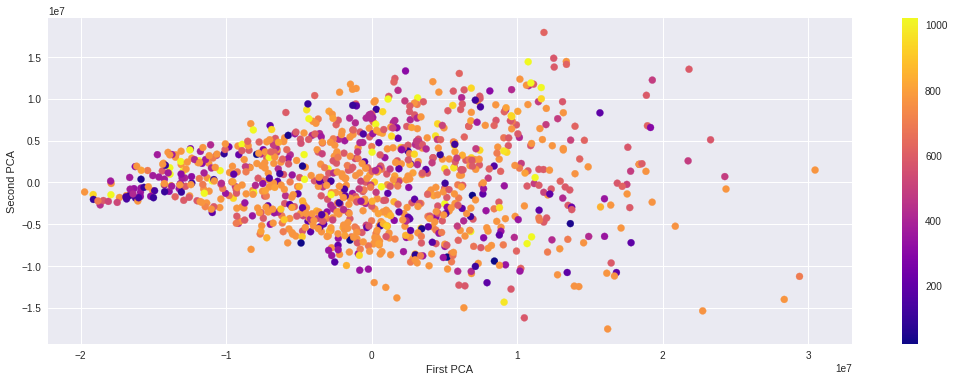

In [0]:
# Creating a probability Matrix for Layer-5
layer_5_probabilities=layer_5

# Using the above tensor to calculate the test data layer-1 probabilities
layer_5_prob = layer_5_probabilities.eval(feed_dict={x: mnist.test.images}, session=sess)

# Fetching 1000 examples
layer_5_prob_1000_samples = layer_5_prob[:1000,]

# Capturing MAX index locations
layer_5_prob_1000_samples_MAX  = np.argmax(layer_5_prob_1000_samples,axis=1)

# Test data: PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(layer_5_prob_1000_samples)
layer_5_prob_1000_samples_pca = pca.transform(layer_5_prob_1000_samples)

# Plotting 1000 examples from  Layer-5 output

plt.figure(figsize=(18,6))
plt.scatter(layer_5_prob_1000_samples_pca[:,0],layer_5_prob_1000_samples_pca[:,1],c=layer_5_prob_1000_samples_MAX,cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

plt.colorbar()

# Based on the plot below, the data is not that easy to classify. 
# Data is spread across 0 to 1000 classes.

In [0]:
# In the above series of graph, i noticed that as the data moves through different layers the scatter plot changed, that is, more of the data points got
# gighlighted with more solid colurs which is more close to the actual class.


# Question-2

In [0]:
!pip install librosa # in colab, you'll need to install this


In [0]:
import librosa


In [49]:
from google.colab import files

uploaded = files.upload()

Saving test_x_01.wav to test_x_01.wav
Saving test_x_02.wav to test_x_02.wav
Saving train_clean_male.wav to train_clean_male.wav
Saving train_dirty_male.wav to train_dirty_male.wav


In [50]:
!ls

MNIST_data   test_x_01.wav  train_clean_male.wav
sample_data  test_x_02.wav  train_dirty_male.wav


In [0]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [52]:
S.shape


(513, 2459)

In [53]:
X.shape

(513, 2459)

In [54]:
# check the datatype "complex64"
S[1]

array([-0.0074651 -7.1489581e-19j, -0.0058472 +1.9232348e-03j,
       -0.00499169+1.3369430e-03j, ...,  0.01239926-2.9420073e-03j,
        0.00327344+1.4116246e-03j,  0.00467709-1.1185871e-03j],
      dtype=complex64)

In [55]:
type(S)

numpy.ndarray

In [0]:
import numpy as np
S_mod = np.absolute(S)

In [57]:
S_mod[1]

array([0.0074651 , 0.00615537, 0.00516763, ..., 0.01274351, 0.00356484,
       0.00480899], dtype=float32)

In [0]:
X_mod = np.absolute(X)

In [59]:
X_mod.shape

(513, 2459)

In [60]:
S_mod.shape

(513, 2459)

In [0]:
S_mod_transpose = S_mod.T
X_mod_transpose = X_mod.T

In [62]:
S_mod_transpose.shape
X_mod_transpose.shape

(2459, 513)

In [0]:
# Initiallizing parameter

learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_classes = 513
n_samples = 55000
n_input = 513
n_hidden_1 = 2459



In [65]:
import numpy as np
import tensorflow as tf

Xa_Init = tf.contrib.layers.xavier_initializer()

h1 = tf.Variable(Xa_Init([n_input, n_hidden_1]))
h_out = tf.Variable(Xa_Init([n_hidden_1, n_classes]))

b1 = tf.Variable(Xa_Init([n_hidden_1]))
b_out = tf.Variable(Xa_Init([n_classes]))

def network_2(x):
  layer_1 = tf.add(tf.matmul(x, h1), b1)
  sm_lay_1 = tf.nn.softmax(layer_1)
  layer_1 = tf.nn.relu(layer_1)
   
  out_layer = tf.add(tf.matmul(layer_1, h_out),b_out)
  
  return out_layer

# Input placeholder 

x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call
pred = network_2(x)
                   
# Loss
loss = tf.losses.mean_squared_error(y, pred)

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


Instructions for updating:
Use tf.cast instead.


In [66]:
# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

# 15 loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x = X_mod_transpose[rand_ind]
    batch_y = S_mod_transpose[rand_ind]
    
    #print("batch_x:", batch_x.shape)
    #print("batch_y:", batch_y.shape)
    
    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
    
  print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))

print("\nModel has completed {} epochs of training".format(training_epochs))
                   
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
                   
# As the correct_predictions value is of type Boolean so will CAST it to Float

correct_predictions = tf.cast(correct_predictions,float)
                   
# Calculate MEAN across tensors which will give the Train Data Set Accuracy

accuracy = tf.reduce_mean(correct_predictions)                 
                  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost is 0.0066 
Epoch: 2 cost is 0.0022 
Epoch: 3 cost is 0.0012 
Epoch: 4 cost is 0.0013 
Epoch: 5 cost is 0.0014 
Epoch: 6 cost is 0.0013 
Epoch: 7 cost is 0.0007 
Epoch: 8 cost is 0.0010 
Epoch: 9 cost is 0.0008 
Epoch: 10 cost is 0.0007 
Epoch: 11 cost is 0.0008 
Epoch: 12 cost is 0.0006 
Epoch: 13 cost is 0.0006 
Epoch: 14 cost is 0.0009 
Epoch: 15 cost is 0.0004 

Model has completed 15 epochs of training


In [0]:
s_test1, sr_test1=librosa.load('test_x_01.wav', sr=None)
S_test1=librosa.stft(s_test1, n_fft=1024, hop_length=512)


In [68]:
S_test1.shape

(513, 142)

In [0]:
S_test1_mod = np.absolute(S_test1)

In [70]:
S_test1_mod.shape

(513, 142)

In [0]:
S_test1_mod_transpose = S_test1_mod.T

In [72]:
S_test1_mod_transpose.shape

(142, 513)

In [0]:
prediction=tf.argmax(pred,1)

In [74]:
prediction

<tf.Tensor 'ArgMax_5:0' shape=(?,) dtype=int64>

In [0]:

S_hat_test = prediction.eval(feed_dict={x: S_test1_mod_transpose}, session=sess)


In [0]:
S_hat_intermediate = (S_test1/S_test1_mod)

In [77]:
S_hat_intermediate.shape


(513, 142)

In [78]:
S_hat_test.shape

(142,)

In [0]:
S_hat = np.multiply(S_hat_intermediate,S_hat_test)

In [0]:
S_hat_recon = librosa.istft(S_hat)

In [0]:
librosa.output.write_wav('test_s_01_recons.wav', S_hat_recon, sr)

In [0]:
s_test2, sr = librosa.load('test_x_02.wav', sr=None)
S_test2 = librosa.stft(s_test2, n_fft=1024, hop_length=512)

S_test2_mod = np.absolute(S_test2)

S_test2_mod_transpose = S_test2_mod.T

prediction = tf.argmax(pred,1)

S_hat_test = prediction.eval(feed_dict={x: S_test2_mod_transpose}, session=sess)

S_hat_intermediate = (S_test2/S_test2_mod)

S_hat = np.multiply(S_hat_intermediate,S_hat_test)

S_hat_recon = librosa.istft(S_hat)

librosa.output.write_wav('test_s_02_recons.wav', S_hat_recon, sr)


In [83]:
!ls

MNIST_data   test_s_01_recons.wav  test_x_01.wav  train_clean_male.wav
sample_data  test_s_02_recons.wav  test_x_02.wav  train_dirty_male.wav


In [0]:
from google.colab import files

with open('test_s_02_recons.wav', 'w') as f:
  f.write('test_s_02_recons.wav')

files.download('test_s_02_recons.wav')

In [0]:
from google.colab import files

with open('test_s_01_recons.wav', 'w') as f:
  f.write('test_s_01_recons.wav')

files.download('test_s_01_recons.wav')